In [29]:
#import relavent packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn import metrics
digits = load_digits()

In [15]:
print ("Data Shape", digits.data.shape)

Data Shape (1797, 64)


In [16]:
print ("Label Data shape", digits.target.shape)

Label Data shape (1797,)


In [43]:
#split Data into testing and training set
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.1, random_state=0)

In [44]:
#setup the model
logistic_reg_model = LogisticRegression(solver='liblinear', random_state=0) #choose solver. default is lbfgs
#fit the model with x_train:digits, y_train:labels
logistic_reg_model.fit(x_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [45]:
#pridict one observation
logistic_reg_model.predict(x_test[0].reshape(1,-1))

array([2])

In [46]:
#predict all labels
logistic_reg_model.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [47]:
#Make predictions on the entire test data of 1797 images
#logistic_reg_model.predict(x_test)

In [42]:
#Accuracy of the model 
score = logistic_reg_model.score(x_test,y_test)
print (score)

0.9485396383866481


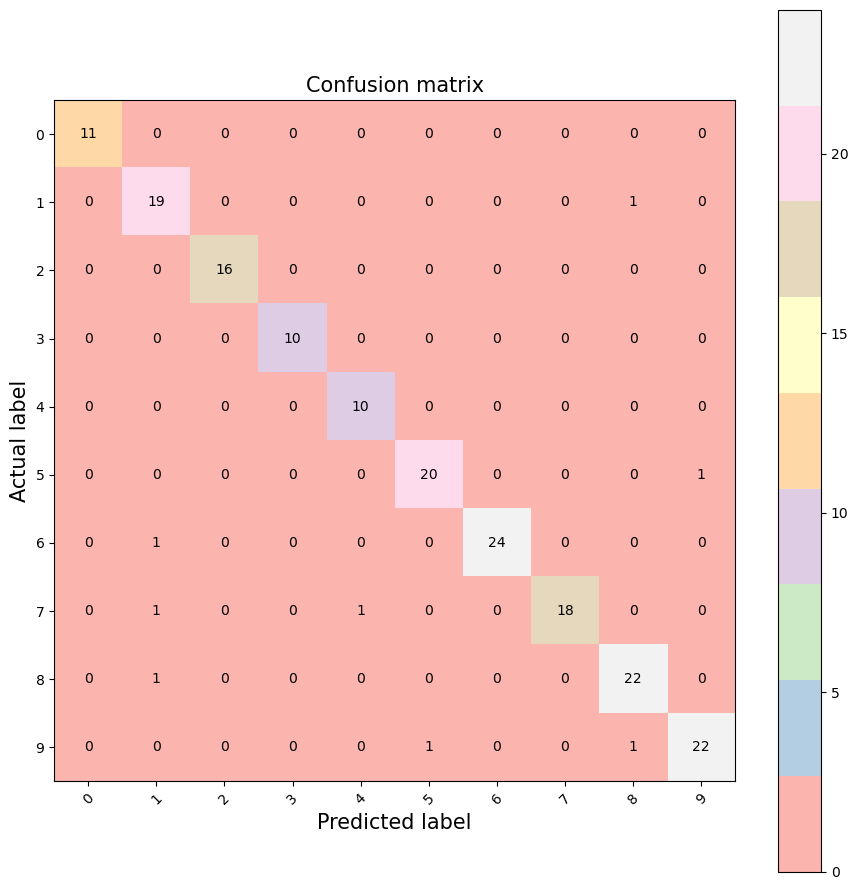

In [48]:
#confusion Matrix
cm = metrics.confusion_matrix(y_test, logistic_reg_model.predict(x_test))
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(10):
    for y in range(10):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
#plt.savefig('EUID_digits_LR__CM.png')
plt.show()